# Supervised Learning - Machine Learning 2020
## Dengue
### Group AA



##  Libraries and tools


Import the libraries and tools needed to carry out our tasks

In [3]:
# Data load and manipulation
from google.colab import files
import io

# DataFrame librery
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from tabulate import tabulate

# Basic Operations
import numpy as np
import itertools

# Prepocessing
from sklearn import preprocessing 
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

# Models
from sklearn import neighbors
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

## Data loading

We define a method to perform the data load

In [4]:
def upload_files (index_fields):
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), index_col = index_fields)
    return df

Load training dataset features (dengue_features_train)

In [5]:
print("Please, upload 'dengue_features_train' file")
X_train = upload_files(['city', 'weekofyear', 'year'])
X_train.head()

Please, upload 'dengue_features_train' file


Saving dengue_features_train.csv to dengue_features_train.csv
User uploaded file "dengue_features_train.csv" with length 287139 bytes


week_start_date  ...  station_precip_mm
city weekofyear year                  ...                   
sj   18         1990      1990-04-30  ...               16.0
     19         1990      1990-05-07  ...                8.6
     20         1990      1990-05-14  ...               41.4
     21         1990      1990-05-21  ...                4.0
     22         1990      1990-05-28  ...                5.8

[5 rows x 21 columns]

Load training dataset labels (dengue_labels_train)

In [6]:
print("Please, upload 'dengue_labels_train' file")
y_train = upload_files(['city', 'weekofyear', 'year'])
y_train.head()

Please, upload 'dengue_labels_train' file


Saving dengue_labels_train.csv to dengue_labels_train.csv
User uploaded file "dengue_labels_train.csv" with length 19582 bytes


total_cases
city weekofyear year             
sj   18         1990            4
     19         1990            5
     20         1990            4
     21         1990            3
     22         1990            6

Load training dataset features (dengue_features_test)

In [7]:
print("Please, upload 'dengue_features_test' file")
X_test = upload_files(['city', 'weekofyear', 'year'])
X_test.head()

Please, upload 'dengue_features_test' file


Saving dengue_features_test.csv to dengue_features_test.csv
User uploaded file "dengue_features_test.csv" with length 82465 bytes


week_start_date  ...  station_precip_mm
city weekofyear year                  ...                   
sj   18         2008      2008-04-29  ...               75.2
     19         2008      2008-05-06  ...               34.3
     20         2008      2008-05-13  ...                3.0
     21         2008      2008-05-20  ...                0.3
     22         2008      2008-05-27  ...               84.1

[5 rows x 21 columns]

## Preprocessing

First, we're going to check every feature dtype.

In [8]:
X_train.dtypes

week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rng_c                  float64
station_max_temp_c                       float64
station_min_temp_c                       float64
station_precip_mm   

Then, we are going to drop useless features.

In [9]:
X_train.drop("week_start_date", axis = 1, inplace = True)

In [10]:
pd.isnull(X_train).any()

ndvi_ne                                  True
ndvi_nw                                  True
ndvi_se                                  True
ndvi_sw                                  True
precipitation_amt_mm                     True
reanalysis_air_temp_k                    True
reanalysis_avg_temp_k                    True
reanalysis_dew_point_temp_k              True
reanalysis_max_air_temp_k                True
reanalysis_min_air_temp_k                True
reanalysis_precip_amt_kg_per_m2          True
reanalysis_relative_humidity_percent     True
reanalysis_sat_precip_amt_mm             True
reanalysis_specific_humidity_g_per_kg    True
reanalysis_tdtr_k                        True
station_avg_temp_c                       True
station_diur_temp_rng_c                  True
station_max_temp_c                       True
station_min_temp_c                       True
station_precip_mm                        True
dtype: bool

We have many null values. We will use the K Nearest Neighbour Imputer to fill those empty values.

In [11]:
imputer = KNNImputer(n_neighbors=4)
X_train[:] = imputer.fit_transform(X_train)

pd.isnull(X_train).any()

ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_temp_c                       False
station_min_temp_c                       False
station_precip_mm                        False
dtype: bool

Normalize data using an scaler. We have tested several scalers, concluding that the MinMaxScaler was the one that gave us better results.

Tested scalers:
- MinMaxScaler
- StandardScaler
- RobustScaler

In [12]:
scaler = MinMaxScaler()
X_train = pd.DataFrame(data = scaler.fit_transform(X_train), columns=X_train.columns)

Lastly, we remove index from the labels in order to easily handle data.

In [13]:
y_train.reset_index(drop=True, inplace=True)

## Model - K-Nearest Neighbors

In this base line, we are going to use a basic regression technique: K-Nearest Neighbors (kNN). This algorithm is based on learning by analogy, commonly known as instance-basedalgorithm, which does not attempt to construct a general internalmodel, but simply stores instances of training data.

We are going to use 2 nested loops to iterate over different combinations of parameters, fitting a kNN model for each combination. We will use a third loop to validate each model with cross-validation. We'll only consider 2 parameters, number of neighbors and weights.  

Minimum Value uniform : 21.344731748281113 (45)
Minimum Value distance : 21.327810775380904 (45)


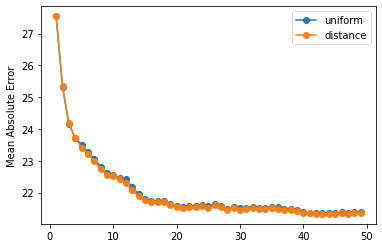

In [14]:

kf = KFold(n_splits = 10, shuffle = False)


for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []

   for n_neighbors in range(1,50):

       fold_accuracy = []

       knn_model = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)

       # We validate the model with cross-validation
       for train_fold, validation_fold in kf.split(X_train):

          # Divide dataset into random train/validation
          f_X_train = X_train.loc[train_fold]
          f_y_train = y_train.loc[train_fold]
          f_X_validation = X_train.loc[validation_fold]
          f_y_validation = y_train.loc[validation_fold]

          # Train the model
          knn_model.fit(X = f_X_train, y = f_y_train)

          # Evaluate the model
          y_pred = knn_model.predict(X = f_X_validation)
          mae = mean_absolute_error(f_y_validation, y_pred)
          fold_accuracy.append(mae)

       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
   plt.plot(range(1,len(total_scores)+1), total_scores, marker='o', label=weights)
   print ('Minimum Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
   plt.ylabel('Mean Absolute Error')      
    
plt.legend()
plt.show() 


When we tested every combination of parameters, we built amodel with the parameters of the model with best results on vali-dation:
- Number of neighbors(n_neighbors): 45
- Weights: 'distance'

In [15]:
# Build the best model
n_neighbors = 45
weights = 'distance'

knn_model = neighbors.KNeighborsRegressor(n_neighbors= n_neighbors, weights=weights) 

# Fit the best model
knn_model.fit(X = X_train, y = y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=45, p=2,
                    weights='distance')

We apply the same preprocessings steps we did over training data on test data.

In [16]:
pd.isnull(X_test).any()

week_start_date                          False
ndvi_ne                                   True
ndvi_nw                                   True
ndvi_se                                   True
ndvi_sw                                   True
precipitation_amt_mm                      True
reanalysis_air_temp_k                     True
reanalysis_avg_temp_k                     True
reanalysis_dew_point_temp_k               True
reanalysis_max_air_temp_k                 True
reanalysis_min_air_temp_k                 True
reanalysis_precip_amt_kg_per_m2           True
reanalysis_relative_humidity_percent      True
reanalysis_sat_precip_amt_mm              True
reanalysis_specific_humidity_g_per_kg     True
reanalysis_tdtr_k                         True
station_avg_temp_c                        True
station_diur_temp_rng_c                   True
station_max_temp_c                        True
station_min_temp_c                        True
station_precip_mm                         True
dtype: bool

In [17]:
X_test.drop("week_start_date", axis = 1, inplace = True)
X_test[:] = imputer.transform(X_test)
pd.isnull(X_train).any()

ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_temp_c                       False
station_min_temp_c                       False
station_precip_mm                        False
dtype: bool

In [18]:
test_index = X_test.index

In [19]:
X_test = pd.DataFrame(data = scaler.transform(X_test), columns=X_test.columns)

Finally, we predict using the model built, and generate an output with the results.

In [20]:
# Predict over the test data
y_pred = knn_model.predict(X = X_test)

# Round the result and cast to integer
y = np.rint(y_pred)
y = y.astype(int)
res = np.hstack(y)

# Generate output
output = pd.DataFrame({ 'city': test_index.get_level_values(0), 'year': test_index.get_level_values(2), 'weekofyear': test_index.get_level_values(1), 
                       'total_cases': res})

with open('result.csv', 'w') as f:
  output.to_csv(f,  index = False)
  
files.download('result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>